In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [45]:
df1 = pd.read_csv('data/features_basicas.csv', low_memory=False, index_col='person')
df1["proprosion"] = np.where(df1["cant_viewed_product"]>0, (df1["cant_checkouts"]/df1["cant_viewed_product"]),0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38829 entries, 4886f805 to 80aea0a0
Data columns (total 12 columns):
cant_conversions               38829 non-null float64
cant_checkouts                 38829 non-null float64
cant_viewed_product            38829 non-null float64
cant_searched_product          38829 non-null float64
cant_ad_campaign_hit           38829 non-null float64
ad_campaign_hit                38829 non-null bool
cant_lead                      38829 non-null float64
cant_brand_listing             38829 non-null float64
brand listing                  38829 non-null bool
total_sesiones                 38829 non-null int64
promedio_eventos_por_sesion    38829 non-null float64
proprosion                     38829 non-null float64
dtypes: bool(2), float64(9), int64(1)
memory usage: 3.3+ MB


In [46]:
df2 = pd.read_csv('data/vistas_promedio.csv', low_memory=False, index_col='person')
#df3 = pd.read_csv('data/featureUsuarioRealizaAlMenos10EventosEn20Minutos.csv', low_memory=False, index_col='person')
df4 = pd.read_csv('data/features_mas_vistos.csv', low_memory=False, index_col='person')
df5 = pd.read_csv('data/features_compras.csv', low_memory=False, index_col='person')
df6 = pd.read_csv('data/features_checkout.csv', low_memory=False, index_col='person')
df7 = pd.read_csv('data/features_time.csv', low_memory=False, index_col='person')
df8 = pd.read_csv('data/features_time_2.csv', low_memory=False, index_col='person')
df9 = pd.read_csv('data/features_time_3.csv', low_memory=False, index_col='person')

df_unidos = df1.join(df2).fillna(0)
#df_unidos = df_unidos.join(df3).fillna(0)
df_unidos = df_unidos.join(df4).fillna(0)
df_unidos = df_unidos.join(df5).fillna(0)
df_unidos = df_unidos.join(df6).fillna(0)
df_unidos = df_unidos.join(df7).fillna(0)
df_unidos = df_unidos.join(df8).fillna(0)
df_unidos = df_unidos.join(df9).fillna(0)
df_unidos

,cant_conversions,cant_checkouts,cant_viewed_product,cant_searched_product,cant_ad_campaign_hit,ad_campaign_hit,cant_lead,cant_brand_listing,brand listing,total_sesiones,...,vio_mas_motorola,compro_apple,compro_samsung,compro_motorola,check_apple,check_samsung,check_motorola,timestamp,prom_timestamp,sum_timestamp
person,,,,,,,,,,,,,,,,,,,,,
4886f805,0.0,1.0,4.0,1.0,0.0,False,0.0,0.0,False,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1526603430000000000,1526602376249999872,1.221282e+19
ad93850f,0.0,1.0,20.0,0.0,10.0,True,0.0,15.0,True,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1527029454000000000,1526573415320754944,8.090839e+19
0297fc1e,0.0,7.0,404.0,6.0,29.0,True,1.0,4.0,True,89,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1527508212000000000,1522498682203065856,7.947443e+20
2d681dd8,0.0,1.0,13.0,1.0,1.0,True,0.0,5.0,True,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1527450169000000000,1527141699500000256,3.359712e+19
cccea85e,0.0,1.0,739.0,1.0,15.0,True,0.0,7.0,True,17,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1527777510000000000,1526707378753567488,1.177091e+21
4c8a8b93,0.0,2.0,177.0,9.0,14.0,True,0.0,8.0,True,14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1526949198000000000,1526693704236841472,3.480862e+20
1b9f7cf6,0.0,1.0,9.0,8.0,0.0,False,0.0,3.0,True,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1526897630000000000,1526618185000000256,3.511222e+19
29ebb414,0.0,1.0,8.0,11.0,4.0,True,0.0,0.0,False,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1526837857000000000,1526651492240000256,3.816629e+19
de8fe91b,0.0,1.0,27.0,13.0,0.0,False,0.0,3.0,True,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1526942248000000000,1526727758057692672,7.938984e+19


In [47]:
labels = pd.read_csv('data/labels_training_set.csv', low_memory=False, index_col='person')


df_test = df_unidos.join(labels, how= "inner")
df_test.head()

,cant_conversions,cant_checkouts,cant_viewed_product,cant_searched_product,cant_ad_campaign_hit,ad_campaign_hit,cant_lead,cant_brand_listing,brand listing,total_sesiones,...,compro_apple,compro_samsung,compro_motorola,check_apple,check_samsung,check_motorola,timestamp,prom_timestamp,sum_timestamp,label
person,,,,,,,,,,,,,,,,,,,,,
ad93850f,0.0,1.0,20.0,0.0,10.0,True,0.0,15.0,True,5,...,0.0,0.0,0.0,1.0,0.0,0.0,1527029454000000000,1526573415320754944,8.090839e+19,0
1b9f7cf6,0.0,1.0,9.0,8.0,0.0,False,0.0,3.0,True,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1526897630000000000,1526618185000000256,3.511222e+19,0
de8fe91b,0.0,1.0,27.0,13.0,0.0,False,0.0,3.0,True,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1526942248000000000,1526727758057692672,7.938984e+19,0
45baf068,0.0,1.0,6.0,0.0,5.0,True,0.0,3.0,True,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1526604888000000000,1526604452055555584,2.747888e+19,0
99abca5a,2.0,18.0,630.0,5.0,12.0,True,1.0,30.0,True,49,...,0.0,0.0,1.0,0.0,0.0,1.0,1527628601000000000,1523847700382507008,1.167267e+21,0


In [48]:
X, y = df_test.iloc[:,:-1],df_test.iloc[:,-1]

In [49]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [51]:
xg_reg = xgb.XGBClassifier(objective='binary:logistic',max_depth=13,learning_rate=0.1,n_estimators=500,silent=True,n_jobs=-1)

In [52]:
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [53]:
score=xg_reg.score(X_test,y_test)*100
print(score)

95.1583826938


In [54]:
preds = xg_reg.predict(X_test)

"""from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
model = xgboost.XGBClassifier(objective='binary:logistic',max_depth=13,learning_rate=0.1,n_estimators=500,silent=True,n_jobs=-1)
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
model.fit(X_train,y_train)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))"""

In [55]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

[14:11:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:11:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:11:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:11:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[14:11:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[14:11:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:11:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:11:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[14:11:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_dep

In [56]:
cv_results

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0.459895,0.000287,0.459846,0.000433
1,0.424331,0.000772,0.424145,0.000604
2,0.393477,0.001137,0.393249,0.001033
3,0.365952,0.001652,0.365583,0.001299
4,0.342008,0.002043,0.341487,0.001620
5,0.321505,0.002439,0.320868,0.001987
6,0.303810,0.002862,0.303084,0.002337
7,0.288635,0.003477,0.287696,0.002367
8,0.275809,0.003964,0.274732,0.002590
9,0.264766,0.004441,0.263463,0.002703


In [57]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.220037


In [58]:
df_submit = pd.read_csv('data/trocafone_kaggle_test.csv', low_memory=False, index_col='person')
df_events = df_submit.join(df_unidos, how='inner')
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19415 entries, 4886f805 to 80aea0a0
Data columns (total 25 columns):
cant_conversions               19415 non-null float64
cant_checkouts                 19415 non-null float64
cant_viewed_product            19415 non-null float64
cant_searched_product          19415 non-null float64
cant_ad_campaign_hit           19415 non-null float64
ad_campaign_hit                19415 non-null bool
cant_lead                      19415 non-null float64
cant_brand_listing             19415 non-null float64
brand listing                  19415 non-null bool
total_sesiones                 19415 non-null int64
promedio_eventos_por_sesion    19415 non-null float64
proprosion                     19415 non-null float64
mas_prom                       19415 non-null float64
vio_mas_apple                  19415 non-null float64
vio_mas_samsung                19415 non-null float64
vio_mas_motorola               19415 non-null float64
compro_apple                  

In [59]:
kaggle_pred = xg_reg.predict_proba(df_events)
proba_de_comprar = [x[1] for x in kaggle_pred]
series = pd.Series(proba_de_comprar)
df_submit['label'] = abs(series.values)


In [60]:
df_submit.to_csv('submit_xg.csv')

In [38]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[14:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[14:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[14:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:10:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[14:10:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:10:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[14:10:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_de

In [20]:
import matplotlib.pyplot as plt

"""xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()"""

"xgb.plot_tree(xg_reg,num_trees=0)\nplt.rcParams['figure.figsize'] = [100, 100]\nplt.show()"

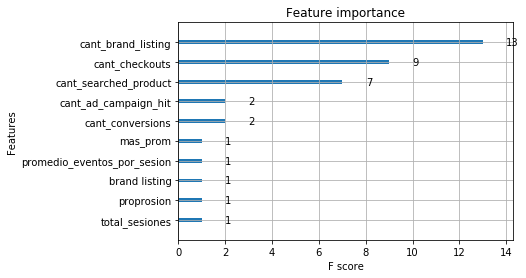

In [60]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()